In [1]:
import numpy as np

from mlhand import dataset, config

from matplotlib import pyplot as plt

import pandas as pd

In [2]:
df = dataset.load_raw_data()

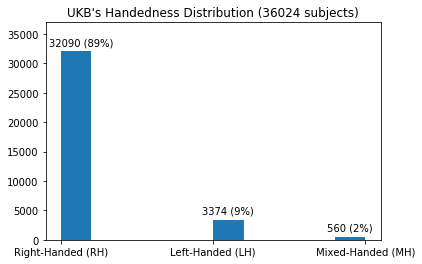

In [3]:
percentage_rh = np.mean(df.Handedness == 1)*100
df.Handedness.hist(grid=False)
plt.xticks([1, 2, 3], ["Right-Handed (RH)", "Left-Handed (LH)", "Mixed-Handed (MH)"])
plt.text(
        1.13,
        np.sum(df.Handedness == 1)+ 1000,
        f"{np.sum(df.Handedness == 1)} ({percentage_rh:.0f}%)",
        {
            'horizontalalignment': 'center'
        }
    )


plt.text(
        2.10,
        4500,
        f"{np.sum(df.Handedness == 2)} ({np.mean(df.Handedness == 2)*100:.0f}%)",
        {
            'horizontalalignment': 'center'
        }
    )

plt.text(
        2.90,
        1500,
        f"{np.sum(df.Handedness == 3)} ({np.mean(df.Handedness == 3)*100:.0f}%)",
        {
            'horizontalalignment': 'center'
        }
    )

plt.ylim(0, 37000)
plt.title("UKB's Handedness Distribution (%d subjects)" % len(df))

plt.savefig("../figures/fig-1-handedness-distribution.pdf")

## Demographic Information

In [7]:
df_controlled = dataset.get_unimodal_data("controlled_variables")

In [36]:
df_controlled.shape

(36024, 24)

In [28]:
ages = df_controlled["confound-generic:age"]
sex = df_controlled["confound-generic:sex"]

In [26]:
print(f"Median {ages.median()}")
print(f"Range: {ages.min()}-{ages.max()}")

Median 64.0
Range: 45-81


In [35]:
# According to https://biobank.ndph.ox.ac.uk/ukb/coding.cgi?id=9, 
# - 0 is female
# - 1 is male
# According to the webpage, the percentage of female is ~54%.

num_females = (sex == 0).sum()
print(f"Number of female subjects {num_females:d} ({num_females/sex.shape[0]*100:.0f}%)")

Number of female subjects 19171 (53%)


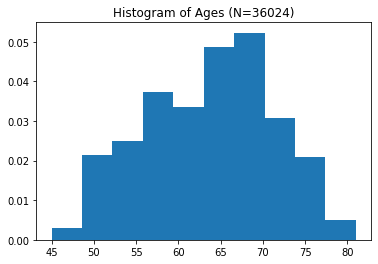

In [38]:
plt.title(f"Histogram of Ages (N={sex.shape[0]})")
plt.hist(
    ages,
    density=True,
);